# Apple Data Team uses #adt


In [1]:
import seaborn as sns
import pandas as pd
import datetime, sys
import matplotlib, statistics

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## First, pull all changesets from Athena (using the AWS OSM Public Dataset)

```sql
SELECT 
  uid,
  min("user") AS username, 
  MIN(created_at) as first_changeset_with_hashtag, 
  MAX(created_at) as latest_changeset_with_hashtag, 
  COUNT(id) as changesets_with_hashtag, 
  SUM(num_changes) as total_changes
FROM changesets 
WHERE lower(tags['hashtags']) like '%#adt%'
GROUP BY uid
```

In [28]:
df = pd.read_csv('./data/apple_hashtags.csv')
df['first'] = df.first_changeset_with_hashtag.apply(lambda t: pd.Timestamp(t))
df['latest'] = df.latest_changeset_with_hashtag.apply(lambda t: pd.Timestamp(t))
print("Found {:,} users".format(len(df)))
df.head(2)

Found 836 users


,uid,username,first_changeset_with_hashtag,latest_changeset_with_hashtag,changesets_with_hashtag,total_changes,first,latest
0,11187564,RwenzoriRange,2020-06-04 05:08:22.000,2020-07-17 12:01:28.000,312,34395,2020-06-04 05:08:22,2020-07-17 12:01:28
1,10892484,CuillinHills,2020-06-01 04:55:08.000,2020-07-17 11:50:07.000,661,93356,2020-06-01 04:55:08,2020-07-17 11:50:07


In [29]:
print("Top 10 Mappers")
df.sort_values(by='total_changes', ascending=False).head(10)

Top 10 Mappers


,uid,username,first_changeset_with_hashtag,latest_changeset_with_hashtag,changesets_with_hashtag,total_changes,first,latest
638,10652956,Bluemlisalp,2020-06-01 05:53:59.000,2020-07-17 09:43:36.000,1121,243034,2020-06-01 05:53:59,2020-07-17 09:43:36
395,10142311,Flatirons,2020-06-01 04:55:48.000,2020-07-17 11:34:15.000,1684,186412,2020-06-01 04:55:48,2020-07-17 11:34:15
73,9388995,TsangpoGorge,2020-06-01 05:15:57.000,2020-07-17 11:07:11.000,213,178525,2020-06-01 05:15:57,2020-07-17 11:07:11
805,10409707,Zaculeu,2020-06-03 04:32:47.000,2020-07-17 10:31:49.000,1138,155298,2020-06-03 04:32:47,2020-07-17 10:31:49
699,10811218,DolomiteMountainRange,2020-06-01 04:42:32.000,2020-07-17 11:32:42.000,1223,155193,2020-06-01 04:42:32,2020-07-17 11:32:42
736,10888767,Pantanal5,2020-06-01 04:58:07.000,2020-07-17 10:45:43.000,800,153515,2020-06-01 04:58:07,2020-07-17 10:45:43
166,10019169,Ometepe,2020-06-01 05:28:18.000,2020-07-17 12:18:36.000,656,149758,2020-06-01 05:28:18,2020-07-17 12:18:36
260,10811361,Poblenou3,2020-06-01 05:12:29.000,2020-07-17 12:13:24.000,1219,146329,2020-06-01 05:12:29,2020-07-17 12:13:24
591,10529535,LaFloresta,2020-06-01 04:11:38.000,2020-07-17 11:10:18.000,922,138651,2020-06-01 04:11:38,2020-07-17 11:10:18
188,10409536,PizBernina,2020-06-01 07:09:22.000,2020-07-17 12:08:35.000,1000,132668,2020-06-01 07:09:22,2020-07-17 12:08:35


# When was the Hashtag adopted? 

Text(0.5,1,'Apple Data team members using hashtag #adt')

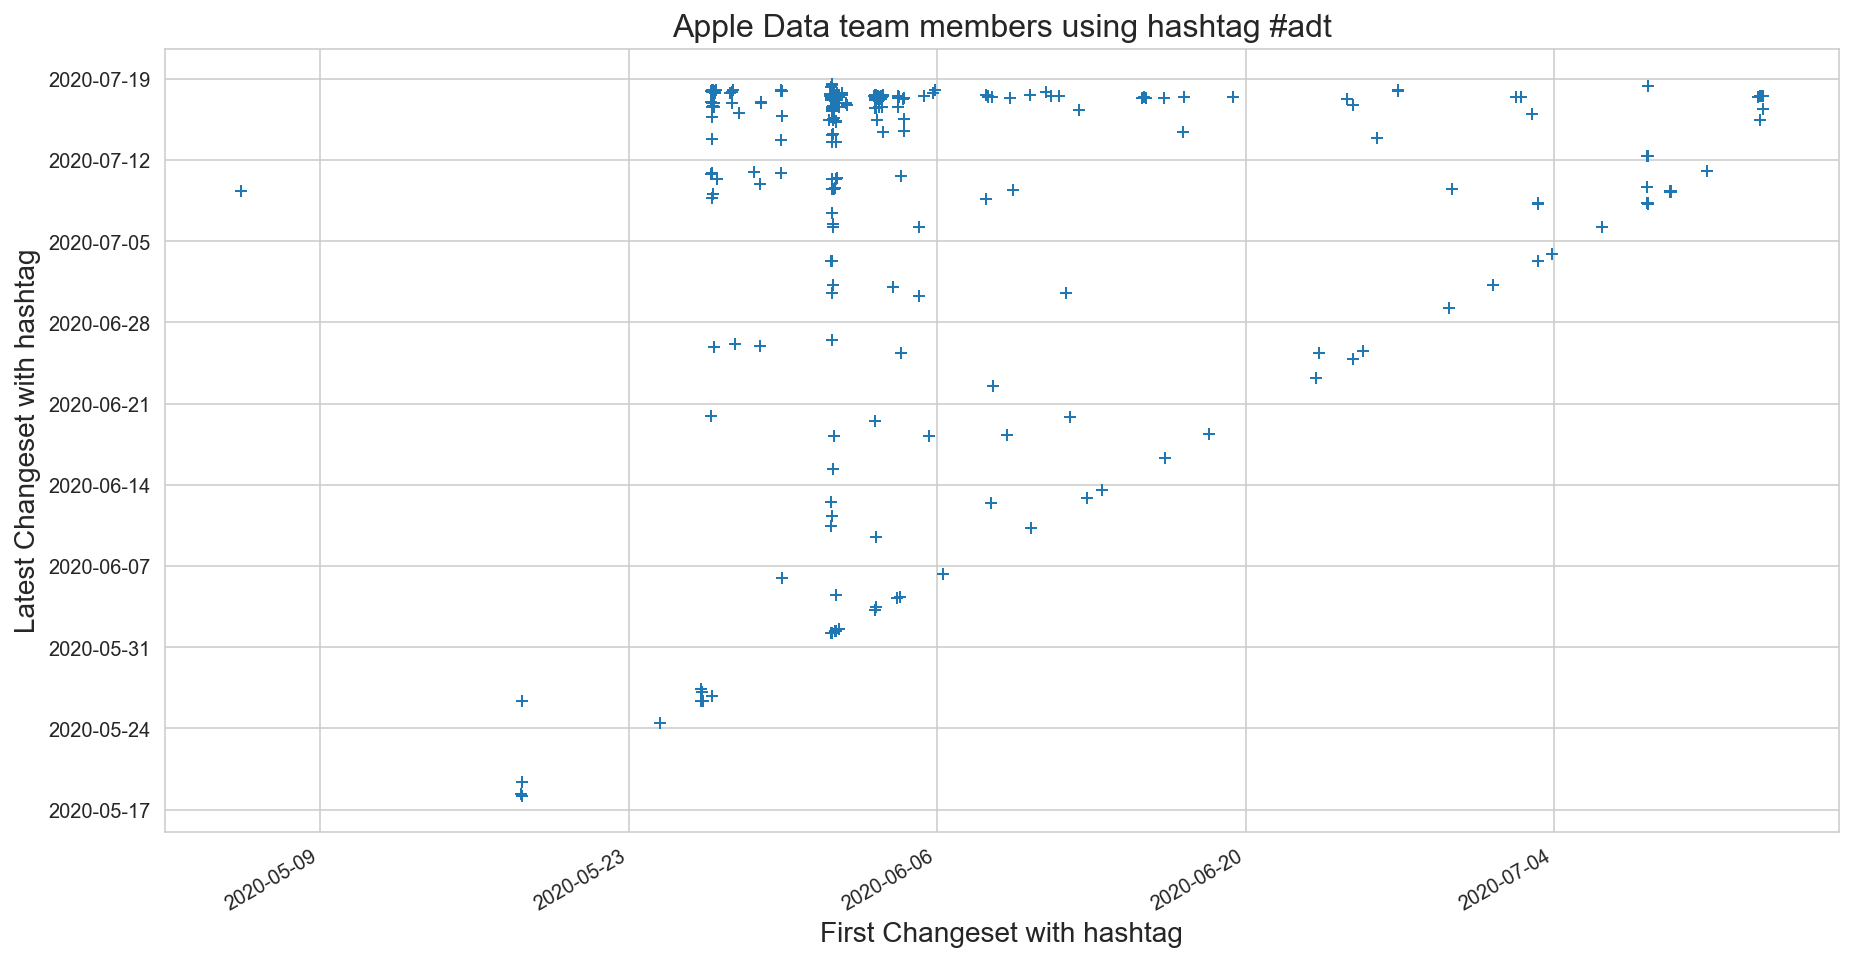

In [42]:
sns.set_style("whitegrid")

ax = df.set_index('first')['latest'].plot(figsize=(15,8), style="+")

# ax2.legend(['Daily Edits from RapID'], loc="upper right", fontsize=14)
ax.set_ylabel("Latest Changeset with hashtag", fontsize=14);
ax.set_xlabel("First Changeset with hashtag", fontsize=14);
ax.set_title("Apple Data team members using hashtag #adt", fontsize=16);
